In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("sales_dataset.csv")

In [10]:
# Data inspection
print(df.shape) # Data shape
display(df.head(3)) # First three rows
display(df.tail(3)) # Last three rows
df.info() # General description
print(df.isna().sum()) # Number of missing values
df.duplicated().sum() # Number of duplicated rows

(11, 8)


,OrderID,CustomerID,Product,Category,Quantity,Price,Date,Country
0,1001,C001,Shoes,Fashion,2,50.0,2025-01-05,USA
1,1002,C002,Bag,Fashion,1,40.0,2025-01-06,UK
2,1003,C003,T-Shirt,Fashion,3,20.0,2025-01-07,USA


,OrderID,CustomerID,Product,Category,Quantity,Price,Date,Country
8,1009,C005,Watch,Accessories,1,100.0,2025-01-13,USA
9,1010,C004,Bag,Fashion,2,40.0,2025-01-14,France
10,1001,C001,Shoes,Fashion,2,50.0,2025-01-05,USA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     11 non-null     int64  
 1   CustomerID  11 non-null     object 
 2   Product     11 non-null     object 
 3   Category    11 non-null     object 
 4   Quantity    11 non-null     int64  
 5   Price       10 non-null     float64
 6   Date        11 non-null     object 
 7   Country     11 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 836.0+ bytes
OrderID       0
CustomerID    0
Product       0
Category      0
Quantity      0
Price         1
Date          0
Country       0
dtype: int64


np.int64(1)

In [11]:
# Data type adjustment
print(df.dtypes)
# We need to change date and price values
df["Price"] = pd.to_numeric(df["Price"])
df["Date"] = pd.to_datetime(df["Date"])
# Fill missing values with the mean
df["Price"] = df["Price"].fillna(df["Price"].mean())
# Remove duplicated rows
df.drop_duplicates(inplace=True)
# Detect outliers
display(df[df["Price"]<0]) # None found
# Texts seem well formatted

OrderID         int64
CustomerID     object
Product        object
Category       object
Quantity        int64
Price         float64
Date           object
Country        object
dtype: object


,OrderID,CustomerID,Product,Category,Quantity,Price,Date,Country


In [12]:
# Create necessary columns
df["Revenue"] = df["Quantity"] * df["Price"]
df["Day"] = df["Date"].dt.day_name()
df["Month"] = df["Date"].dt.month_name()
display(df)

,OrderID,CustomerID,Product,Category,Quantity,Price,Date,Country,Revenue,Day,Month
0,1001,C001,Shoes,Fashion,2,50.0,2025-01-05,USA,100.0,Sunday,January
1,1002,C002,Bag,Fashion,1,40.0,2025-01-06,UK,40.0,Monday,January
2,1003,C003,T-Shirt,Fashion,3,20.0,2025-01-07,USA,60.0,Tuesday,January
3,1004,C004,Watch,Accessories,1,100.0,2025-01-08,France,100.0,Wednesday,January
4,1005,C005,Shoes,Fashion,2,50.0,2025-01-09,UK,100.0,Thursday,January
5,1006,C001,Bag,Fashion,1,40.0,2025-01-10,USA,40.0,Friday,January
6,1007,C003,T-Shirt,Fashion,2,20.0,2025-01-11,France,40.0,Saturday,January
7,1008,C002,Shoes,Fashion,3,51.0,2025-01-12,UK,153.0,Sunday,January
8,1009,C005,Watch,Accessories,1,100.0,2025-01-13,USA,100.0,Monday,January
9,1010,C004,Bag,Fashion,2,40.0,2025-01-14,France,80.0,Tuesday,January


In [13]:
# Group revenue by day, product, and category
dayr = df.groupby("Day")["Revenue"].sum()
prodr = df.groupby("Product")["Revenue"].sum()
Categoryr = df.groupby("Category")["Revenue"].sum()

# Identify best and worst performing day and product
bm = dayr.idxmax()
wm = dayr.idxmin()
bp = prodr.idxmax()
wp = prodr.idxmin()

# Display grouped revenue data
display(dayr)
display(prodr)
display(Categoryr)

# Print best and worst day/product
print(f"best Day/product is: {bm} / {bp}")
print(f"worst Day/product is: {wm} / {wp}")

Day
Friday        40.0
Monday       140.0
Saturday      40.0
Sunday       253.0
Thursday     100.0
Tuesday      140.0
Wednesday    100.0
Name: Revenue, dtype: float64

Product
Bag        160.0
Shoes      353.0
T-Shirt    100.0
Watch      200.0
Name: Revenue, dtype: float64

Category
Accessories    200.0
Fashion        613.0
Name: Revenue, dtype: float64

best Day/product is: Sunday / Shoes
worst Day/product is: Friday / T-Shirt


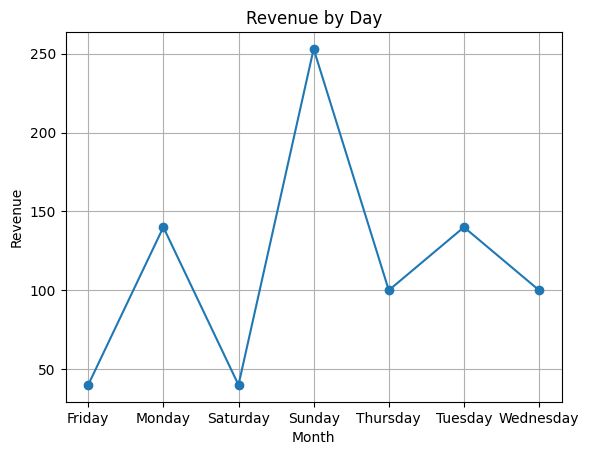

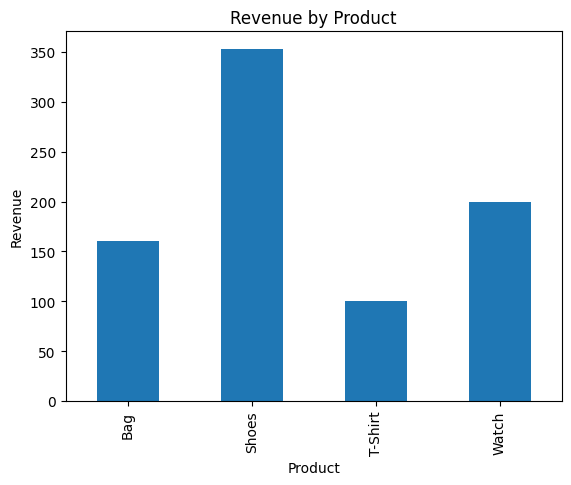

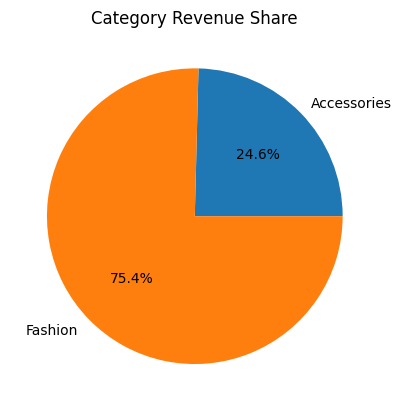

In [14]:
# Plot revenue by day as a line chart
dayr.plot(kind="line", marker="o", title="Revenue by Day")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

# Plot revenue by product as a bar chart
prodr.plot(kind="bar", title="Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()

# Plot category revenue share as a pie chart
Categoryr.plot(kind="pie", autopct="%1.1f%%", title="Category Revenue Share")
plt.ylabel("")
plt.show()
